# Собрать заголовки и тексты материалов с первых десяти страниц рубрики.

Определить формат ссылки для пагинации - 1 балл

В разметке страницы найти уникальные классы/идентификаторы блока с названием и содержанием материала- 3 балла

Получить содержимое десяти страниц списка материалов, выделить из него ссылки на каждый материал - 2 балла

Перебрать все полученные ссылки и получить html-код каждого материала - 1 балл

Распарсить полученный текст разметки с помощью BeautifulSoup, вытащив по каждой ссылке заголовок и содержание материала - 2 балла

Создать датайфрейм с полученными данными - 1 балл

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

In [48]:
base_url = 'https://lifehacker.ru/topics/technology' # базовая часть ссылки
response = requests.get('https://lifehacker.ru/topics/technology/?page=1') # получаем контент первой страиниц
soup = BeautifulSoup(response.text, 'lxml') # инициализируем объект bs4 и задаем парсер lxml

Нужный класс со ссылкой на статью детектед: `lh-small-article-card__link`

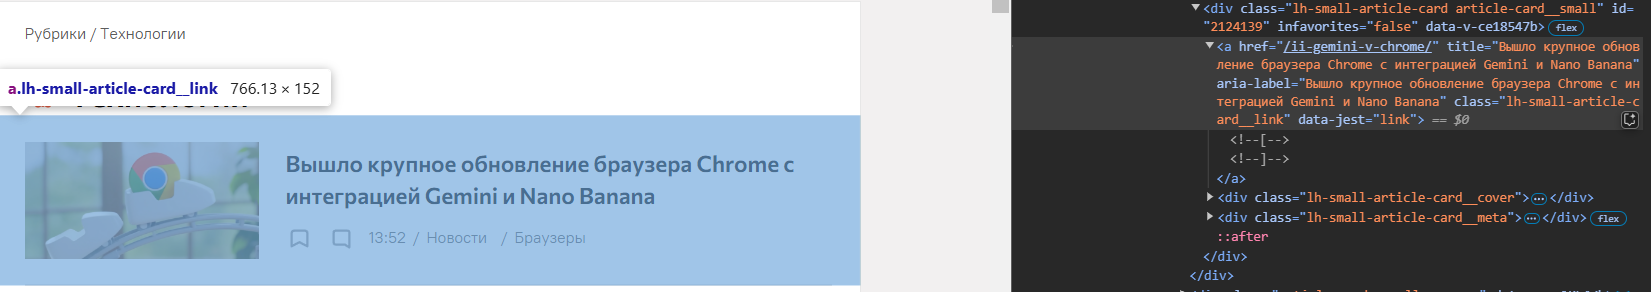

На лайфхакере нет проблем с генерацией кода страницы, как на хабре, всё можно найти сразу в разметке, поэтому пробуем спарсить ссылки с первой страницы


In [49]:
raw_items = soup.find_all('a', class_='lh-small-article-card__link') # ищем все a-элементы с нужным классом

In [50]:
links = [item.get('href') for item in raw_items] # получаем у ссылок только href-атрибут
links

['/samye-populyarnye-smartfony-2025/',
 '/ii-gemini-v-chrome/',
 '/mify-o-gadzhetax/',
 '/obzor-redmi-note-15-pro-5g/',
 '/skrinshoty-aluminium-os/',
 '/v-seti-zavirusilsya-moltbot/',
 '/openai-zapustila-prism/',
 '/durov-raskritikoval-whatsapp/',
 '/obzor-huawei-mate-x7/',
 '/sozdan-letayushhii-zond/',
 '/massazher-s-podogrevom-xiaomi/',
 '/chem-mikser-otlichaetsya-ot-blendera/',
 '/skrinshoty-android-17-s-effektom-razmytiya/',
 '/brauzery-s-ii/',
 '/prilozheniya-kotorymi-zamenil-servisy-google-sozdatel-ethereum/',
 '/kak-otpravit-samounichtozhayushheesya-foto-v-telegram/',
 '/chto-posle-cifrovogo-detoksa/',
 '/obnaruzheny-virusy-klikery/',
 '/sboi-raboty-outlook/',
 '/prilozhenie-blip/',
 '/kakie-naushniki-vybrat/',
 '/predstavlen-dvuxetazhnyi-aerogril-xiaomi/',
 '/novye-funkcii-v-bloknote-i-paint-na-windows-11/',
 '/memy-s-samim-soboi-v-google-foto/',
 '/maket-skladnogo-iphone/',
 '/huawei-matepad-11-5s-papermatte-edition-2026-obzor/',
 '/anons-nexphone/',
 '/v-kitae-ispytali-dirizh

In [32]:
len(links)

30

Ура, работает! Собираем ссылки со всех 10 страниц

In [51]:
parsed_urls = []

In [52]:
for page_num in range(1, 11):
    url = f'{base_url}?page={page_num}' # подставляем нужный номер страницы для пагинации, дальше парсим каждую страницу аналогично коду выше
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    raw_items = soup.find_all('a', class_='lh-small-article-card__link')
    parsed_urls += [item.get('href') for item in raw_items]

In [53]:
len(parsed_urls) # 10 страниц X 30 статей

300

Переберем полученные ссылки и вытащим с каждой статьи заголовок и текст. Начнем с одной статьи, чтобы разобраться

In [54]:
response = requests.get('https://lifehacker.ru/obzor-huawei-mate-x7/')
soup = BeautifulSoup(response.text, 'lxml')
soup.find('h1', class_='article-card__title').text # получили заголовок

'Обзор Huawei Mate X7 — компактного и надёжного складного смартфона\xa0'

In [55]:
soup.find('div', class_='single-article').text # получаем текст статьи

'Устройства27 январяОбзор Huawei Mate X7 — компактного и надёжного складного смартфона\xa0Эффектная модель в красной экокоже стала ещё лучше.Виктор ПодволоцкийШеф-редактор Лайфхакера\n\n\nHuawei Mate X7 пришёл на смену довольно удачной, но не идеальной модели Mate X6. Год назад я советовал её как хороший вариант для тех, кто хочет начать знакомство со складным формфактором, не жертвуя при этом флагманскими камерами. В новой модели производитель переработал начинку, немного изменил дизайн и подтянул несколько важных характеристик. Что из этого получилось и кому подойдёт этот смартфон — давайте разбираться.\xa0Технические характеристикиОперационная системаEMUI 15.0КорпусАлюминий + стекло, влагозащита IP58/IP59ЭкранВнешний — 6,49 дюйма, LTPO OLED, 2 444 × 1 080 пикселей, 1–120 Гц, стекло Kunlun Glass 2Внутренний — 8 дюймов, LTPO OLED, 2 416 × 2 210 пикселей, 1–120\xa0ГцПроцессорKirin 9030 Pro с GPU Maleoon 935 (по данным из открытых источников)Память16 ГБ — оперативная, 512 ГБ — встроенна

Здесь получаем информацию в том числе из заголовка и подзаголовка:
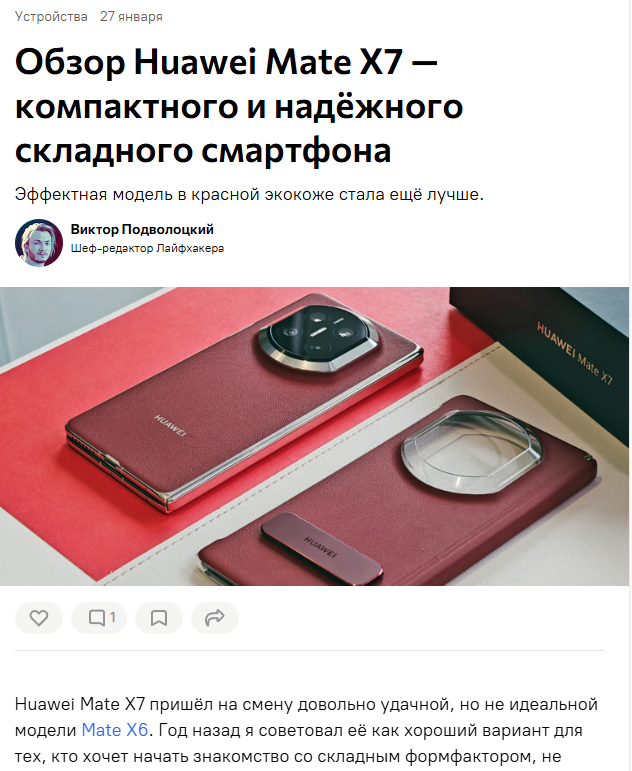


Мне это не понравилось, решила воспользоваться другим путем:

In [56]:
soup.find('article', class_='single-article__post-content single-article__content-container').text

'Huawei Mate X7 пришёл на смену довольно удачной, но не идеальной модели Mate X6. Год назад я советовал её как хороший вариант для тех, кто хочет начать знакомство со складным формфактором, не жертвуя при этом флагманскими камерами. В новой модели производитель переработал начинку, немного изменил дизайн и подтянул несколько важных характеристик. Что из этого получилось и кому подойдёт этот смартфон — давайте разбираться.\xa0Технические характеристикиОперационная системаEMUI 15.0КорпусАлюминий + стекло, влагозащита IP58/IP59ЭкранВнешний — 6,49 дюйма, LTPO OLED, 2 444 × 1 080 пикселей, 1–120 Гц, стекло Kunlun Glass 2Внутренний — 8 дюймов, LTPO OLED, 2 416 × 2 210 пикселей, 1–120\xa0ГцПроцессорKirin 9030 Pro с GPU Maleoon 935 (по данным из открытых источников)Память16 ГБ — оперативная, 512 ГБ — встроеннаяКамерыОсновная: главная — 50 Мп, RYYB-сенсор, переменная диафрагма f/1.4–4.0, PDAF, OIS;ультраширокоугольная — 40 Мп, RYYB-сенсор, диафрагма f/2,2, PDAF;телефотомодуль — 50 Мп, RYYB-сенс

Отлично, теперь проделаем всё то же самое со всеми статьями.

In [63]:
base_url = 'https://lifehacker.ru'

In [64]:
result = []

for url in tqdm(parsed_urls):
    article = {}

    article_url = f'{base_url}{url}' # подставляем часть ссылки, ведущую материал
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'lxml')

    article['title'] = soup.find('h1', class_='article-card__title').text
    article['text'] = soup.find('article', class_='single-article__post-content single-article__content-container').text


    result.append(article)

100%|██████████| 300/300 [03:57<00:00,  1.26it/s]


Сделаем красивый датафрейм

In [65]:
pd.set_option('display.max_colwidth', 400)

In [66]:
data = pd.DataFrame(result)
data.head()

,title,text
0,Доминирование двух брендов: названы 10 самых продаваемых смартфонов в 2025 году,"Аналитики компании Counterpoint Research, занимающейся исследованием рынка технологий, составили топ самых продаваемых смартфонов в мире в 2025 году. Рейтинг с большим отрывом возглавил iPhone 16.Купертинцы заняли сразу семь позиций в топ‑10. Отмечается, что серия iPhone 17 оказалась на 16% популярнее предшественников. Новые смартфоны пользовались высоким спросом на всех ключевых рынках компан..."
1,Вышло крупное обновление браузера Chrome с интеграцией Gemini и Nano Banana,"В прошлом году рынок заполнили новые «умные» браузеры: Atlas от OpenAI, Comet от Perplexity, Dia от The Browser Company. Классические решения, такие как Edge и Opera, тоже получили глубокую интеграцию искусственного интеллекта. Теперь очередь дошла до Google — компания обновила Chrome, добавив целый набор функций на базе Gemini.Основные нововведения:Постоянная боковая панель с Gemini. Теперь ч..."
2,"14 устаревших стереотипов о технике, в которые странно верить в 2026 году","Мы меняем смартфоны каждые пару лет и считаем, что находимся на острие прогресса, — но при этом всерьёз воспринимаем глупые технологические суеверия из середины 2000‑х. И ладно бы это касалось только старшего поколения, которое с гаджетами на вы, но нет: подобные вещи регулярно можно услышать и от тех, кто буквально рос со смартфоном или планшетом в руках.Достаточно заглянуть в комментарии под..."
3,"Усиленная прочность, приятная камера, флагманская выносливость: обзор REDMI Note 15 Pro+ 5G","В России стартовали продажи новой серии смартфонов REDMI — REDMI Note 15. Её главная фишка — титаническая прочность: устройства защитили, кажется, от всех потенциальных вызовов, которые может подкинуть жизнь.Всего в линейке четыре модели, мы протестировали старшую — REDMI Note 15 Pro+ 5G. Рассказываем, чем радует новинка и кому она понравится. До 28 февраля всю линейку REDMI Note 15 в «М.Видео..."
4,Google случайно показала Android для ПК: первые скриншоты Aluminium OS,"С прошлого года Google разрабатывает Android для компьютеров под кодовым названием Aluminium OS. Теперь компания допустила утечку, благодаря которой мы можем увидеть, как примерно будет выглядеть новая операционная система.В Issue Tracker появился ошибочный отчёт о работе вкладок Chrome Incognito, к которому случайно прикрепили два скринкаста с HP Elite Dragonfly 13.5 Chromebook, работающего п..."
